# Phishing Domain Prediction

## Problem Statement:
Phishing is a type of fraud in which an attacker impersonates a reputable company or person in order to get sensitive information such as login credentials or account information via email or other communication channels. Phishing is popular among attackers because it is easier to persuade someone to click a malicious link that appears to be authentic than it is to break through a computer's protection measures. The mail goal is to predict whether the domains are real or malicious.

#### DataDataset:
- Paper Link: -https://www.sciencedirect.com/science/article/pii/S2352340920313202
- Dataset Link: - https://data.mendeley.com/datasets/72ptz43s9v/1 


#### Results: 
You have to build a solution that should able to predict whether the domain is
real or fake.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from statistics import mean
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import PowerTransformer
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.utils import resample

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score,roc_curve,confusion_matrix


from sklearn import metrics 
from sklearn.model_selection import  train_test_split, RepeatedStratifiedKFold, cross_val_score
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer, KNNImputer
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler,RobustScaler
from sklearn.compose import ColumnTransformer
from catboost import CatBoostClassifier

warnings.filterwarnings("ignore")
%matplotlib inline

### Read Data

In [2]:
# Load csv file
df = pd.read_csv('../data/dataset.csv', na_values="na")

In [3]:
# First glance at data
df.head()

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
0,3,0,0,1,0,0,0,0,0,0,...,1,2,0,892,0,0,0,0,0,1
1,5,0,1,3,0,3,0,2,0,0,...,1,2,1,9540,1,0,0,0,0,1
2,2,0,0,1,0,0,0,0,0,0,...,1,2,3,589,1,0,0,0,0,0
3,4,0,2,5,0,0,0,0,0,0,...,1,2,0,292,1,0,0,0,0,1
4,2,0,0,0,0,0,0,0,0,0,...,1,2,1,3597,0,1,0,0,0,0


In [4]:
# check rows and columns of the dataset
df.shape

(88647, 112)

In [5]:
# Check unique values of target varaible
df['phishing'].value_counts()

0    58000
1    30647
Name: phishing, dtype: int64

#### Target column 
The target class 0 denotes legitimate websites while the target class 1 denotes the phishing websites.

In [6]:
#define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 112 numerical features : ['qty_dot_url', 'qty_hyphen_url', 'qty_underline_url', 'qty_slash_url', 'qty_questionmark_url', 'qty_equal_url', 'qty_at_url', 'qty_and_url', 'qty_exclamation_url', 'qty_space_url', 'qty_tilde_url', 'qty_comma_url', 'qty_plus_url', 'qty_asterisk_url', 'qty_hashtag_url', 'qty_dollar_url', 'qty_percent_url', 'qty_tld_url', 'length_url', 'qty_dot_domain', 'qty_hyphen_domain', 'qty_underline_domain', 'qty_slash_domain', 'qty_questionmark_domain', 'qty_equal_domain', 'qty_at_domain', 'qty_and_domain', 'qty_exclamation_domain', 'qty_space_domain', 'qty_tilde_domain', 'qty_comma_domain', 'qty_plus_domain', 'qty_asterisk_domain', 'qty_hashtag_domain', 'qty_dollar_domain', 'qty_percent_domain', 'qty_vowels_domain', 'domain_length', 'domain_in_ip', 'server_client_domain', 'qty_dot_directory', 'qty_hyphen_directory', 'qty_underline_directory', 'qty_slash_directory', 'qty_questionmark_directory', 'qty_equal_directory', 'qty_at_directory', 'qty_and_directory', 'qty_

#### We have lots of column. It makes no sense for interpretation of individual columns

### Checking null values

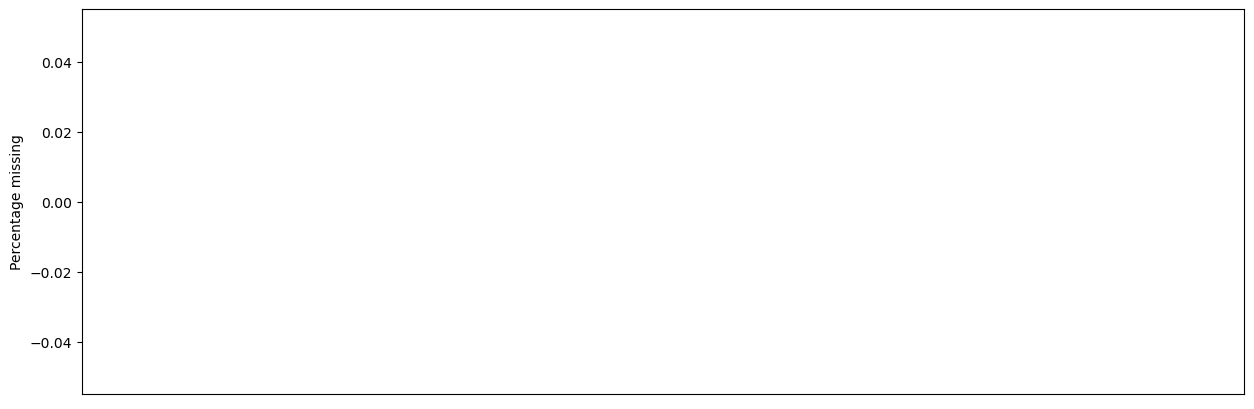

In [7]:
# Plotting Missing values count for each column
fig, ax = plt.subplots(figsize=(15,5))

missing = df.isna().sum().div(df.shape[0]).mul(100).to_frame().sort_values(by=0, ascending = False)

ax.bar(missing.index, missing.values.T[0])
plt.xticks([])
plt.ylabel("Percentage missing")
plt.show()

In [8]:
df.isna().sum().sum()

0

#### Report 
- Great!, No null values

### Visualization of Target Column (phishing)

legitimate: 58000
phishing: 30647


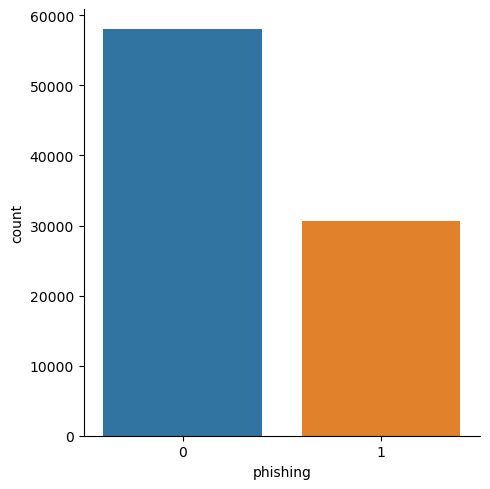

In [9]:
legitimate = df[df['phishing']==0].shape[0]
phishing = df[df['phishing']==1].shape[0]
print("legitimate: " + str(legitimate) + "\nphishing: " + str(phishing))
sns.catplot(data=df, x="phishing", kind="count")

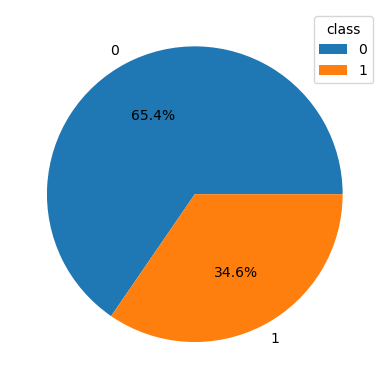

In [10]:
plt.pie(df['phishing'].value_counts(normalize=True),
       labels=df['phishing'].value_counts(normalize=True).index,
       autopct='%.1f%%')
plt.legend(title='class')

#### Report

- The target classes are imbalanced
- Class imbalance is a scenario that arises when we have unequal distribution of class in a dataset. Here 65.4% of legitimate and 34.6% of phishing class in dataset.
- If the imbalanced data is not treated beforehand, then this will degrade the performance of the classifier model.
- Hence we should handle imbalanced data with certain methods.


#### How to handle Imbalance Data ?

- Resampling data is one of the most commonly preferred approaches to deal with an imbalanced dataset. There are broadly two types of methods for this i) Undersampling ii) Oversampling. In most cases, oversampling is preferred over undersampling techniques. The reason being, in undersampling we tend to remove instances from data that may be carrying some important information.
- SMOTE: Synthetic Minority Oversampling Technique
- SMOTE is an oversampling technique where the synthetic samples are generated for the minority class.
- Hybridization techniques involve combining both undersampling and oversampling techniques. This is done to optimize the performance of classifier models for the samples created as part of these techniques.
- It only duplicates the data and it won't add and new information. Hence we look at some different techniques.

### Checking on distribution of numeric features

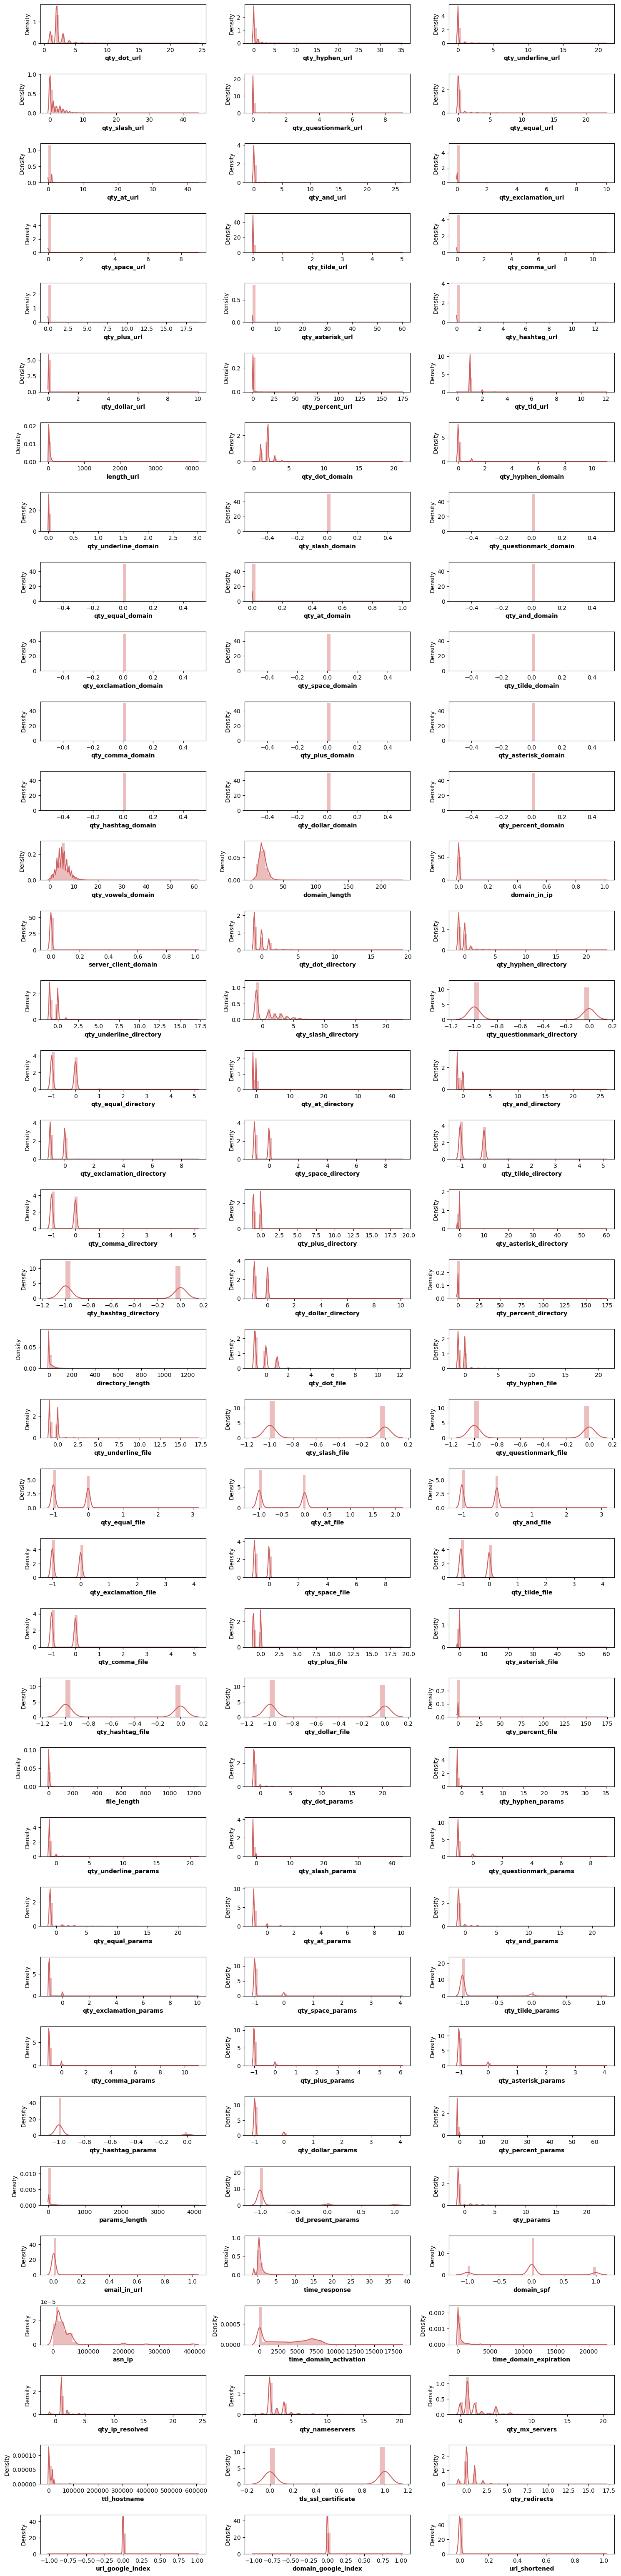

In [11]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
numeric_features.remove('phishing')

plt.figure(figsize=(15, 100))
for i, col in enumerate(numeric_features):
    plt.subplot(60, 3, i+1)
    sns.distplot(x=df[col], color='indianred')
    plt.xlabel(col, weight='bold')
    plt.tight_layout()

#### Report

- As per the above plot most of the features are not normally distributed.
- Transformation of data is not of prime importance since it is a classification problem.
- Interpreting each and every column is not necessary.

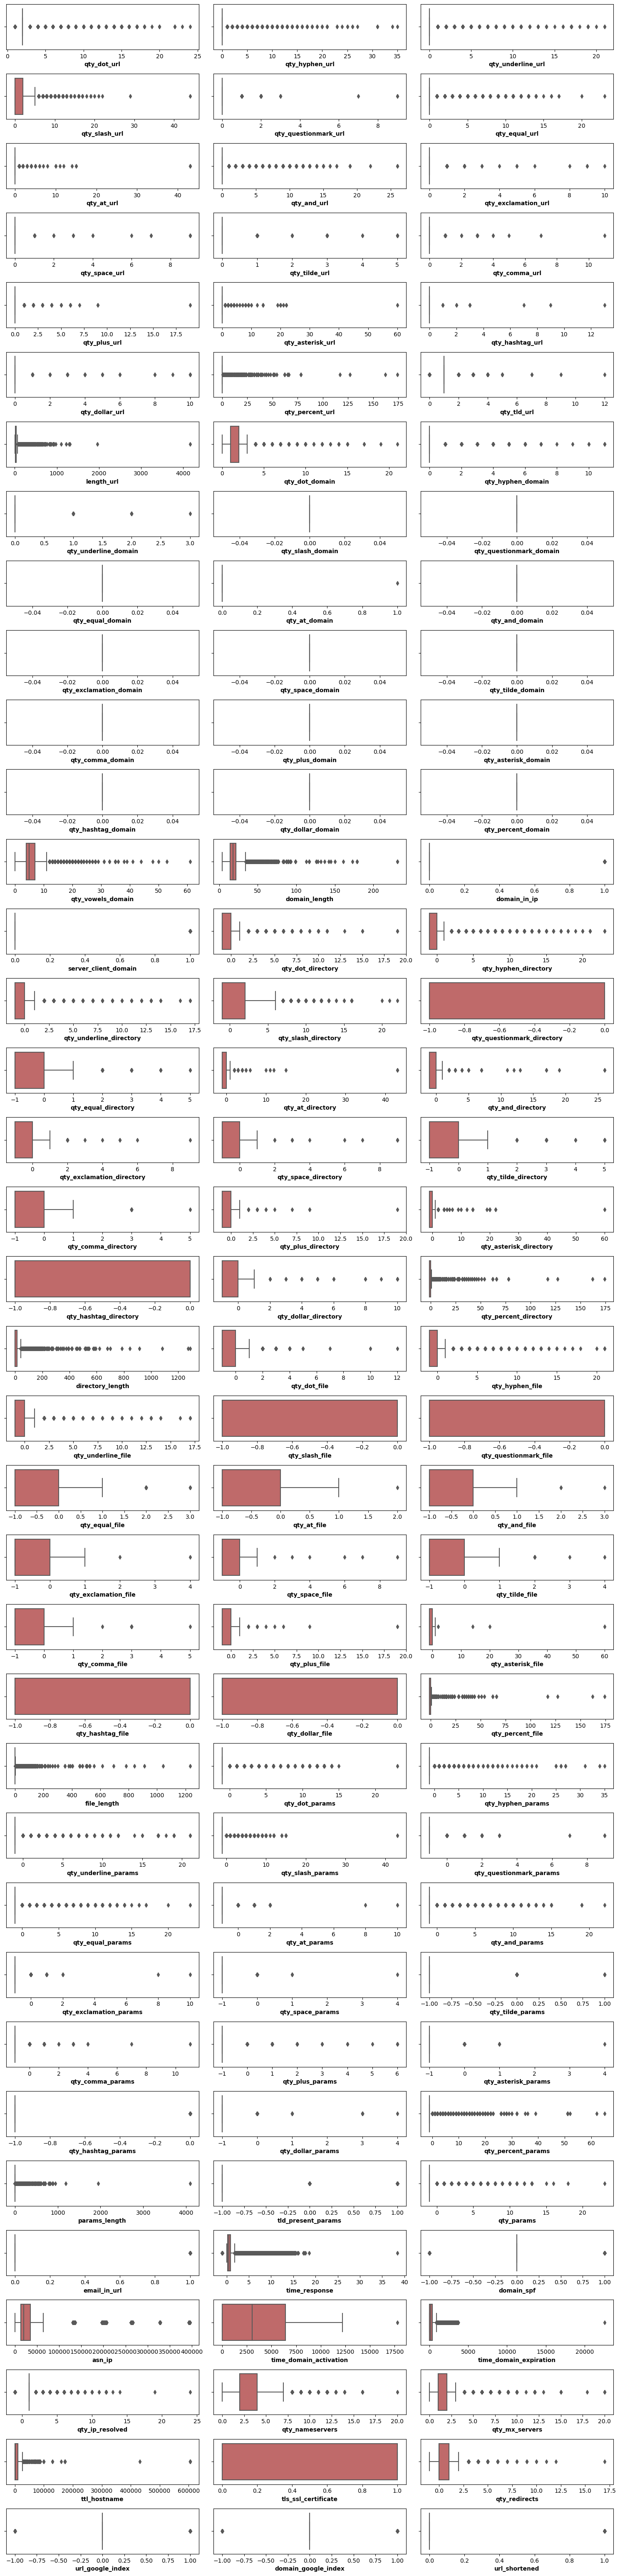

In [12]:
plt.figure(figsize=(15, 100))
for i, col in enumerate(numeric_features):
    plt.subplot(60, 3, i+1)
    sns.boxplot(x=df[col], color='indianred')
    plt.xlabel(col, weight='bold')
    plt.tight_layout()

### Report

- As per the above plot most of the features have outleirs.
- We will experiment by removing the outliers by IDR method.

### Create Functions for model training and evaluation

In [13]:
def evaluate_clf(true, predicted):
    '''
    This function takes in true values and predicted values
    Returns: Accuracy, F1-Score, Precision, Recall, Roc-auc Score
    '''
    acc = accuracy_score(true, predicted) # Calculate Accuracy
    f1 = f1_score(true, predicted) # Calculate F1-score
    precision = precision_score(true, predicted) # Calculate Precision
    recall = recall_score(true, predicted)  # Calculate Recall
    roc_auc = roc_auc_score(true, predicted) #Calculate Roc
    return acc, f1 , precision, recall, roc_auc

In [14]:
# Create cost of the model as per data description
def total_cost(y_true, y_pred):
    '''
    This function takes y_true, y_predicted, and prints Total cost due to misclassification
   
    '''
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    cost = 500*fn
    return cost

In [15]:
# Create a function which can evaluate models and return a report 
def evaluate_models(X, y, models):
    '''
    This function takes in X and y and models dictionary as input
    It splits the data into Train Test split
    Iterates through the given model dictionary and evaluates the metrics
    Returns: Dataframe which contains report of all models metrics with cost
    '''
    # separate dataset into train and test
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
    
    cost_list=[]
    models_list = []
    accuracy_list = []
    
    for i in range(len(list(models))):
        model = list(models.values())[i]
        model.fit(X_train, y_train) # Train model

        # Make predictions
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # Training set performance
        model_train_accuracy, model_train_f1,model_train_precision,\
        model_train_recall,model_train_rocauc_score=evaluate_clf(y_train ,y_train_pred)
        train_cost = total_cost(y_train, y_train_pred)


        # Test set performance
        model_test_accuracy,model_test_f1,model_test_precision,\
        model_test_recall,model_test_rocauc_score=evaluate_clf(y_test, y_test_pred)
        test_cost = total_cost(y_test, y_test_pred)

        print(list(models.keys())[i])
        models_list.append(list(models.keys())[i])
        print('Model performance for Training set')
        print("- Accuracy: {:.4f}".format(model_train_accuracy))
        print('- F1 score: {:.4f}'.format(model_train_f1)) 
        print('- Precision: {:.4f}'.format(model_train_precision))
        print('- Recall: {:.4f}'.format(model_train_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))
        print(f'- COST: {train_cost}.')

        print('----------------------------------')

        print('Model performance for Test set')
        print('- Accuracy: {:.4f}'.format(model_test_accuracy))
        print('- F1 score: {:.4f}'.format(model_test_f1))
        print('- Precision: {:.4f}'.format(model_test_precision))
        print('- Recall: {:.4f}'.format(model_test_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))
        print(f'- COST: {test_cost}.')
        cost_list.append(test_cost)
        print('='*35)
        print('\n')
        
    report=pd.DataFrame(list(zip(models_list, cost_list)), columns=['Model Name', 'Cost']).sort_values(by=["Cost"])
        
    return report

In [16]:
# Splitting X and y for all Experiments
X= df.drop('phishing', axis=1)
y = df['phishing']

### Handling Imbalanced data
- SMOTE+TOMEK is one of such a hybrid technique that aims to clean overlapping data points for each of the classes distributed in sample space.

- This method combines the SMOTE ability to generate synthetic data for minority class and Tomek Links ability to remove the data that are identified as Tomek links from the majority class

- To add new data of minority class

- Choose random data from the minority class.
- Calculate the distance between the random data and its k nearest neighbors.
- Multiply the difference with a random number between 0 and 1, then add the result to the minority class as a synthetic sample.
- Repeat step number 2-3 until the desired proportion of minority class is met.
- To remove the tomek links of the majority class
- Choose random data from the majority class.
- If the random data's nearest neighbor is the data from the minority class (i.e. create the Tomek Link), then remove the Tomek Link.
- This is method instead of adding duplicate data it synthesises the new data based on the already avalialble classes. Hence we choose this as our imputer method for this problem.


In [17]:
from imblearn.combine import SMOTETomek

# Resampling the minority class. The strategy can be changed as required.
smt = SMOTETomek(random_state=42,sampling_strategy='minority',n_jobs=-1)
# Fit the model to generate the data.
X_res, y_res = smt.fit_resample(X, y)

## Evaluate Model on Different experiments
- Exepriment 1: No removal of outleirs.
- Exepriment 2: Removal of outleirs.
- Experiment 3: PCA with remooval of outliers.

#### Exepriment 1: No removal of outleirs

In [18]:
# Dictionary which contains models for experiment
models = {
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Logistic Regression": LogisticRegression(),
     "K-Neighbors Classifier": KNeighborsClassifier(),
    "XGBClassifier": XGBClassifier(), 
     "CatBoosting Classifier": CatBoostClassifier(verbose=False),
    "AdaBoost Classifier": AdaBoostClassifier()
}

In [19]:
report_exp_1 = evaluate_models(X_res, y_res, models)

Random Forest
Model performance for Training set
- Accuracy: 0.9999
- F1 score: 0.9999
- Precision: 1.0000
- Recall: 0.9998
- Roc Auc Score: 0.9999
- COST: 3500.
----------------------------------
Model performance for Test set
- Accuracy: 0.9796
- F1 score: 0.9796
- Precision: 0.9765
- Recall: 0.9827
- Roc Auc Score: 0.9797
- COST: 97500.


Decision Tree
Model performance for Training set
- Accuracy: 0.9999
- F1 score: 0.9999
- Precision: 1.0000
- Recall: 0.9998
- Roc Auc Score: 0.9999
- COST: 4500.
----------------------------------
Model performance for Test set
- Accuracy: 0.9655
- F1 score: 0.9653
- Precision: 0.9657
- Recall: 0.9649
- Roc Auc Score: 0.9655
- COST: 197500.


Gradient Boosting
Model performance for Training set
- Accuracy: 0.9603
- F1 score: 0.9607
- Precision: 0.9506
- Recall: 0.9711
- Roc Auc Score: 0.9603
- COST: 655000.
----------------------------------
Model performance for Test set
- Accuracy: 0.9586
- F1 score: 0.9588
- Precision: 0.9501
- Recall: 0.9675
- 

#### Report for Exp. 1

In [20]:
report_exp_1

,Model Name,Cost
0,Random Forest,97500
6,CatBoosting Classifier,113500
5,XGBClassifier,120500
2,Gradient Boosting,183000
1,Decision Tree,197500
7,AdaBoost Classifier,257000
4,K-Neighbors Classifier,388000
3,Logistic Regression,855000


#### Insights

- For the Experiment 1: No removal of outleirs has Random Forest classifier as the best Model
- Proceeding with further experiments

### Exepriment 2: Removal of outleirs.

In [21]:
X2 = X_res.copy()
def remove_outliers_IQR(col):
    # Finding the IQR
    percentile25 = X2[col].quantile(0.25)
    percentile75 = X2[col].quantile(0.75)
    iqr = percentile75 - percentile25
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr
    X2[col] = np.where(X2[col]>upper_limit, upper_limit, np.where(X2[col]<lower_limit,lower_limit,X2[col]))
    return X2[X2[col] > upper_limit]

In [22]:
for col in numeric_features:
    remove_outliers_IQR(col)

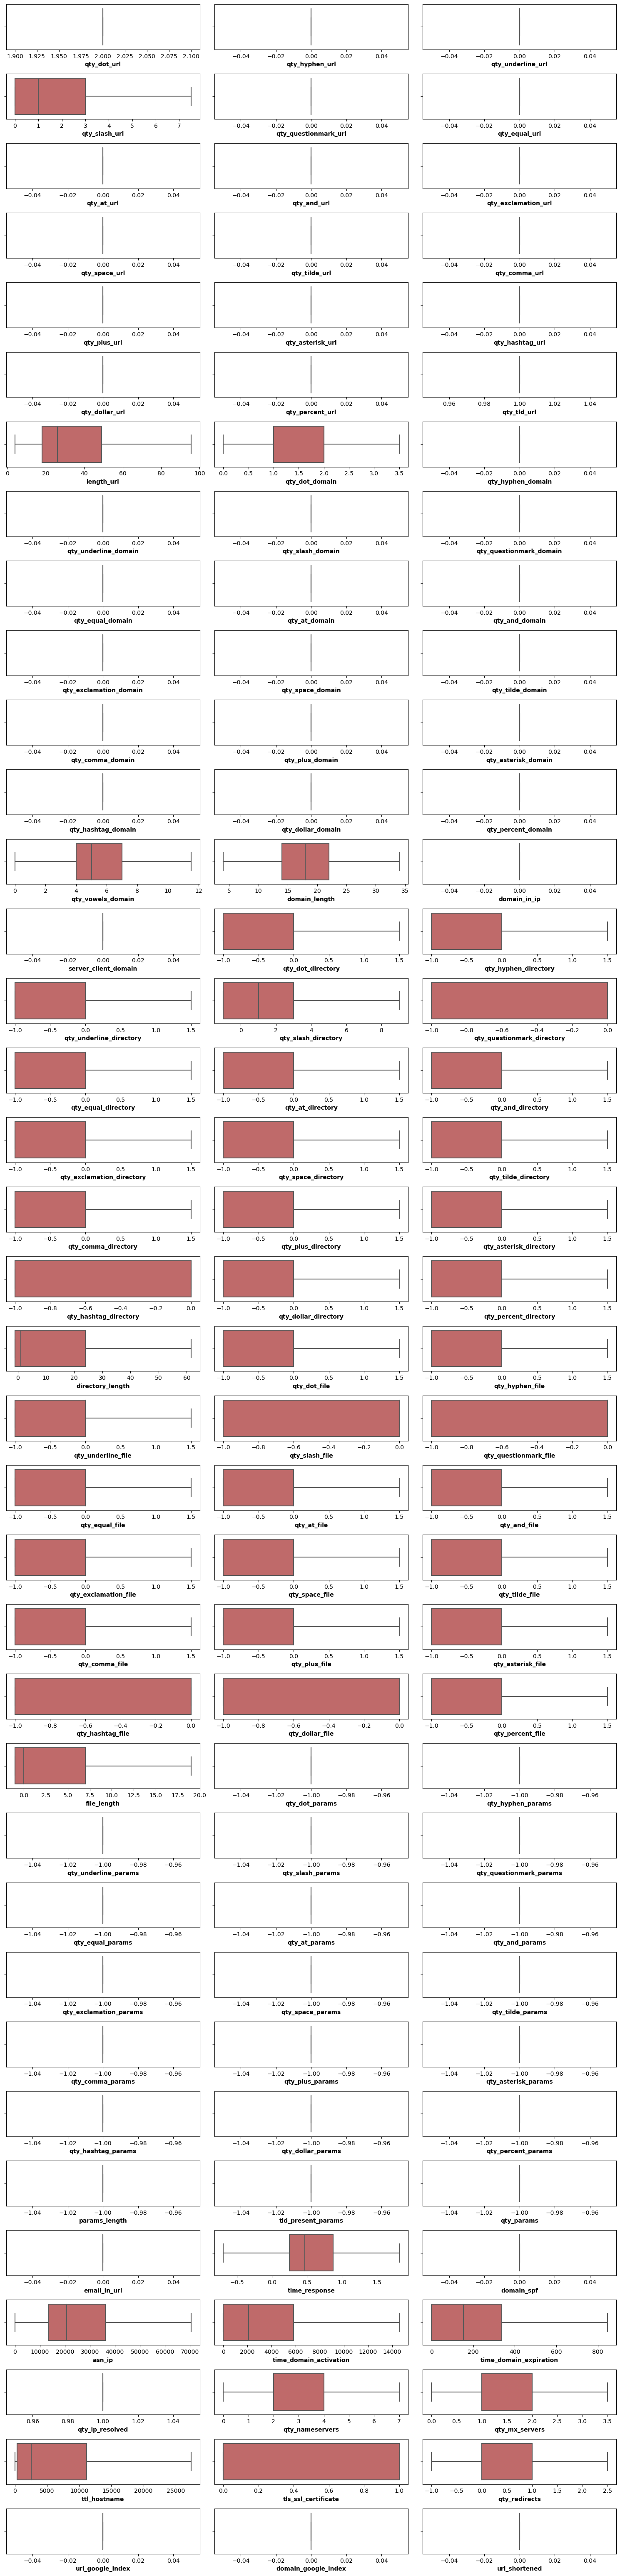

In [23]:
plt.figure(figsize=(15, 100))
for i, col in enumerate(numeric_features):
    plt.subplot(60, 3, i+1)
    sns.boxplot(x=X2[col], color='indianred')
    plt.xlabel(col, weight='bold')
    plt.tight_layout()

In [27]:
report_exp_2 = evaluate_models(X2, y_res, models)

Random Forest
Model performance for Training set
- Accuracy: 0.9999
- F1 score: 0.9999
- Precision: 0.9999
- Recall: 0.9998
- Roc Auc Score: 0.9999
- COST: 3500.
----------------------------------
Model performance for Test set
- Accuracy: 0.9788
- F1 score: 0.9788
- Precision: 0.9739
- Recall: 0.9837
- Roc Auc Score: 0.9788
- COST: 92000.


Decision Tree
Model performance for Training set
- Accuracy: 0.9999
- F1 score: 0.9999
- Precision: 1.0000
- Recall: 0.9998
- Roc Auc Score: 0.9999
- COST: 5000.
----------------------------------
Model performance for Test set
- Accuracy: 0.9667
- F1 score: 0.9665
- Precision: 0.9665
- Recall: 0.9666
- Roc Auc Score: 0.9667
- COST: 188000.


Gradient Boosting
Model performance for Training set
- Accuracy: 0.9588
- F1 score: 0.9593
- Precision: 0.9484
- Recall: 0.9706
- Roc Auc Score: 0.9588
- COST: 667500.
----------------------------------
Model performance for Test set
- Accuracy: 0.9567
- F1 score: 0.9569
- Precision: 0.9475
- Recall: 0.9666
- 

In [28]:
report_exp_2

,Model Name,Cost
0,Random Forest,92000
5,XGBClassifier,115000
6,CatBoosting Classifier,122000
1,Decision Tree,188000
2,Gradient Boosting,188000
7,AdaBoost Classifier,277500
3,Logistic Regression,280500
4,K-Neighbors Classifier,392500


#### Insights
- For the Experiment 2: Removal of outleirs has Random Forest classifier as the best Model

### Experiment 3 :Principle component analysis with Outlier removal

- Principal component analysis is a technique for feature extraction so it combines our input variables in a specific way, then we can drop the least important variables while still retaining the most valuable parts of all of the variables!
- As the dataset has 112 columns we can try PCA and check our metrics Cost

In [29]:
#Applying PCA
from sklearn.decomposition import PCA
var_ratio={}
for n in range(2,112):
    pc=PCA(n_components=n)
    df_pca=pc.fit(X2)
    var_ratio[n]=sum(df_pca.explained_variance_ratio_)

<AxesSubplot:>

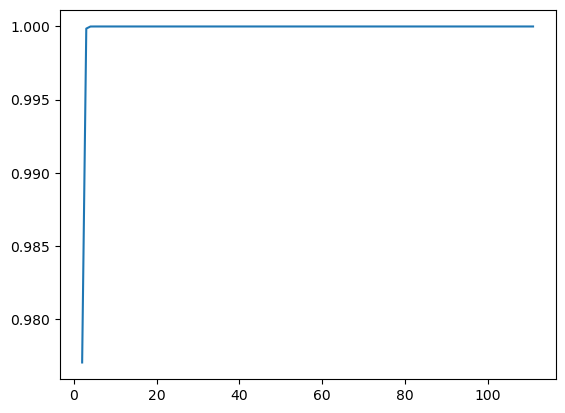

In [30]:
# plotting variance ratio
pd.Series(var_ratio).plot()

<Figure size 500x500 with 0 Axes>

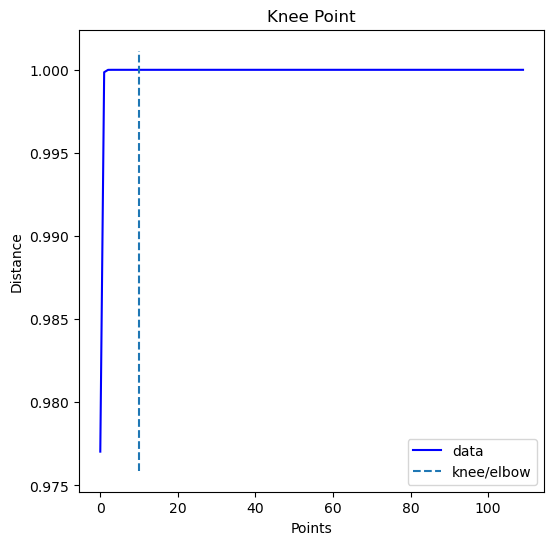

Knee Locator k = 12


In [33]:
from kneed import KneeLocator

i = np.arange(len(var_ratio))
variance_ratio= list(var_ratio.values())
components=  list(var_ratio.keys())
knee = KneeLocator(i, variance_ratio, S=1, curve='concave', interp_method='polynomial')

fig = plt.figure(figsize=(5, 5))
knee.plot_knee()
plt.xlabel("Points")
plt.ylabel("Distance")
plt.show()
k= components[knee.knee]
print('Knee Locator k =', k)

In [34]:
# Reducing the dimensions of the data 
pca_final=PCA(n_components=12,random_state=42).fit(X2)

X_reduced=pca_final.fit_transform(X2)

In [35]:
X_reduced.shape,y_res.shape

((113226, 12), (113226,))

In [36]:
# Training all models
report_pca = evaluate_models(X_reduced,y_res, models)

Random Forest
Model performance for Training set
- Accuracy: 0.9999
- F1 score: 0.9999
- Precision: 0.9999
- Recall: 0.9998
- Roc Auc Score: 0.9999
- COST: 3500.
----------------------------------
Model performance for Test set
- Accuracy: 0.9726
- F1 score: 0.9726
- Precision: 0.9656
- Recall: 0.9798
- Roc Auc Score: 0.9726
- COST: 114000.


Decision Tree
Model performance for Training set
- Accuracy: 0.9999
- F1 score: 0.9999
- Precision: 1.0000
- Recall: 0.9998
- Roc Auc Score: 0.9999
- COST: 5000.
----------------------------------
Model performance for Test set
- Accuracy: 0.9586
- F1 score: 0.9584
- Precision: 0.9582
- Recall: 0.9586
- Roc Auc Score: 0.9586
- COST: 233500.


Gradient Boosting
Model performance for Training set
- Accuracy: 0.9498
- F1 score: 0.9506
- Precision: 0.9368
- Recall: 0.9648
- Roc Auc Score: 0.9498
- COST: 797500.
----------------------------------
Model performance for Test set
- Accuracy: 0.9464
- F1 score: 0.9469
- Precision: 0.9334
- Recall: 0.9609
-

In [37]:
report_pca

,Model Name,Cost
0,Random Forest,114000
6,CatBoosting Classifier,141500
5,XGBClassifier,146500
3,Logistic Regression,199000
2,Gradient Boosting,220500
1,Decision Tree,233500
7,AdaBoost Classifier,291500
4,K-Neighbors Classifier,390500


#### Insights
- For the Experiment 3: PCA with Removal of outleirs has Random Forest classifier as the best Model

## Best Model

In [40]:
from prettytable import PrettyTable

pt=PrettyTable()
pt.field_names=["Model","Imputation_method","Total_cost"]
pt.add_row(["Random Forest","No outlier removal","101500"])
pt.add_row(["Random Forest","Outlier removal","95500"])
pt.add_row(["Random Forest","PCA with outlier removal","110500"])
print(pt)

+---------------+--------------------------+------------+
|     Model     |    Imputation_method     | Total_cost |
+---------------+--------------------------+------------+
| Random Forest |    No outlier removal    |   101500   |
| Random Forest |     Outlier removal      |   95500    |
| Random Forest | PCA with outlier removal |   110500   |
+---------------+--------------------------+------------+


#### Final Report

From the final report we can see than Random Forest with Outlier removed has performed the best with cost of 95500

## Hypertuning Final model 

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X2,y_res,test_size=0.2,random_state=42)

In [ ]:
rfc=RandomForestClassifier(random_state=42)
from sklearn.model_selection import GridSearchCV
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
cv_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
cv_rfc.fit(X_train, y_train)

In [ ]:
cv_rfc.best_params_

In [ ]:
final_model=cv_rfc.best_estimator_
y_pred = final_model.predict(X_test)

In [ ]:
print("Final Random forest Classifier Accuracy Score (Train) :", final_model.score(X_train,y_train))
print("Final Random forest Classifier Accuracy Score (Test) :", accuracy_score(y_pred,y_test))

In [ ]:
print("Final Random forest Classifier Cost Metric(Test) :",total_cost(y_test, y_pred))

In [ ]:
from sklearn.metrics import plot_confusion_matrix

#plots Confusion matrix
plot_confusion_matrix(final_model, X_test, y_test, cmap='Blues', values_format='d')

## The best Model is Random Forest Classifier with 99.6% accuracy and cost of 2950

## Saving model

In [ ]:
import pickle
with open('../Aritifacts/model.pkl', 'wb') as files:
    pickle.dump(final_model, files)